## Pre-processing #1

In [2]:
import numpy as np
import datetime
import pandas as pd
import time

#import DBRead as dbr

#start = time.time()
df = pd.read_pickle("/Users/mbair13/ShepetovWork/data.pkl")
df.head()

#t = dbr.DBRead()
#t.connect()
#df = pd.read_csv("datafile") #parse_dates=[['datep', 'timeut']])

#df['combined'] = pd.to_datetime(df['datep'] + ' ' + df['timeut'])

#print("Done")

#Queries
#df1 = df.query('datetime.date(2006,10,20) <= combined < datetime.date(2006,11,20)') # 59.8, 65.9 ms per loop
#df1 = df[(df['combined'] < datetime.datetime(year=2006, month=11, day=20))] # 19.9 ms per loop
#%timeit df1 = df[(df['datep'] >= '2006-10-20') & (df['datep'] <= '2006-11-20')] # 599 ms per loop

#df2 = df1.set_index(['datep', 'timeut'], inplace=True) # ~300 ms per loop
#df2
#%timeit df2.loc['2006-10-20':'2006-11-20'] # 145 µs per loop

#df = df.set_index(['datep', 'timeut'])
#df = df.sort_index()
#print( df.loc[(slice('2006-01-01','2006-12-31'), slice('00:00:00','07:00:00')), :] )

#df.set_index('combined', inplace=True)
#df.info()

#print(df)

#end = time.time()
#print(end - start)

#def query(df, start_year=2006, start_month=1, start_day=1, end_year=2006, end_month=12, end_day=30):
#    return df[(df['date'] > datetime.date(year=2006,month=1,day=1))]
#    return df.query('datetime.date(2006,9,20) < date < datetime.date(2006,12,30)')

#s = df.iloc[2][2] # access list of values - select 2nd row and the 2nd column

#df['datep'].map(lambda t: t.year).unique() # query the unique years in 'date' col

#df1 = df[df['datep'] >= datetime.date(2006, 10, 21)] # split dataframe by date

#dates = df['datep'].tolist()
#times = df['timeut'].tolist(

,datep,timeut,heliums
0,2006-10-20,00:00:00,"[143, 147, 149, 111, 139, 139, 203, 172, 163, ..."
1,2006-10-20,00:01:00,"[127, 144, 141, 108, 127, 127, 202, 165, 170, ..."
2,2006-10-20,00:02:00,"[113, 134, 168, 130, 135, 137, 194, 168, 165, ..."
3,2006-10-20,00:03:00,"[137, 160, 135, 139, 121, 159, 203, 166, 165, ..."
4,2006-10-20,00:04:00,"[144, 134, 130, 132, 152, 149, 175, 160, 163, ..."


In [3]:
ch_names = ['ch_'+'{:d}'.format(i+1) for i in range(18)]
print(ch_names)

['ch_1', 'ch_2', 'ch_3', 'ch_4', 'ch_5', 'ch_6', 'ch_7', 'ch_8', 'ch_9', 'ch_10', 'ch_11', 'ch_12', 'ch_13', 'ch_14', 'ch_15', 'ch_16', 'ch_17', 'ch_18']


In [4]:
df[ch_names] = pd.DataFrame(df['heliums'].values.tolist()) # slow but tolerable

df.head()

,datep,timeut,heliums,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,...,ch_9,ch_10,ch_11,ch_12,ch_13,ch_14,ch_15,ch_16,ch_17,ch_18
0,2006-10-20,00:00:00,"[143, 147, 149, 111, 139, 139, 203, 172, 163, ...",143,147,149,111,139,139,203.0,...,163.0,176.0,184.0,163.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-10-20,00:01:00,"[127, 144, 141, 108, 127, 127, 202, 165, 170, ...",127,144,141,108,127,127,202.0,...,170.0,181.0,182.0,175.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-10-20,00:02:00,"[113, 134, 168, 130, 135, 137, 194, 168, 165, ...",113,134,168,130,135,137,194.0,...,165.0,156.0,192.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-10-20,00:03:00,"[137, 160, 135, 139, 121, 159, 203, 166, 165, ...",137,160,135,139,121,159,203.0,...,165.0,185.0,187.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-10-20,00:04:00,"[144, 134, 130, 132, 152, 149, 175, 160, 163, ...",144,134,130,132,152,149,175.0,...,163.0,162.0,198.0,180.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.drop('heliums', axis=1, inplace=True)

df.head()

,datep,timeut,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,ch_9,ch_10,ch_11,ch_12,ch_13,ch_14,ch_15,ch_16,ch_17,ch_18
0,2006-10-20,00:00:00,143,147,149,111,139,139,203.0,172.0,163.0,176.0,184.0,163.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-10-20,00:01:00,127,144,141,108,127,127,202.0,165.0,170.0,181.0,182.0,175.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-10-20,00:02:00,113,134,168,130,135,137,194.0,168.0,165.0,156.0,192.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-10-20,00:03:00,137,160,135,139,121,159,203.0,166.0,165.0,185.0,187.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-10-20,00:04:00,144,134,130,132,152,149,175.0,160.0,163.0,162.0,198.0,180.0,NaN,NaN,NaN,NaN,NaN,NaN


## Dealing with NaNs

In [6]:
for col_str in ch_names:
    #df[col_str] = pd.to_numeric(df[col_str], errors='coerce')
    df[col_str].fillna(value=0, inplace=True)


In [7]:
df.head()

,datep,timeut,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,ch_9,ch_10,ch_11,ch_12,ch_13,ch_14,ch_15,ch_16,ch_17,ch_18
0,2006-10-20,00:00:00,143,147,149,111,139,139,203.0,172.0,163.0,176.0,184.0,163.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2006-10-20,00:01:00,127,144,141,108,127,127,202.0,165.0,170.0,181.0,182.0,175.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2006-10-20,00:02:00,113,134,168,130,135,137,194.0,168.0,165.0,156.0,192.0,168.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2006-10-20,00:03:00,137,160,135,139,121,159,203.0,166.0,165.0,185.0,187.0,168.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2006-10-20,00:04:00,144,134,130,132,152,149,175.0,160.0,163.0,162.0,198.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0


## Pre-processing #2

In [8]:
def getDay(date):
    return date.day

def getMonth(date):
    return date.month

def getYear(date):
    return date.year

df['Day'] = df['datep'].apply(getDay)
df['Month'] = df['datep'].apply(getMonth)
df['Year'] = df['datep'].apply(getYear)

df.head()


,datep,timeut,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,...,ch_12,ch_13,ch_14,ch_15,ch_16,ch_17,ch_18,Day,Month,Year
0,2006-10-20,00:00:00,143,147,149,111,139,139,203.0,172.0,...,163.0,0.0,0.0,0.0,0.0,0.0,0.0,20,10,2006
1,2006-10-20,00:01:00,127,144,141,108,127,127,202.0,165.0,...,175.0,0.0,0.0,0.0,0.0,0.0,0.0,20,10,2006
2,2006-10-20,00:02:00,113,134,168,130,135,137,194.0,168.0,...,168.0,0.0,0.0,0.0,0.0,0.0,0.0,20,10,2006
3,2006-10-20,00:03:00,137,160,135,139,121,159,203.0,166.0,...,168.0,0.0,0.0,0.0,0.0,0.0,0.0,20,10,2006
4,2006-10-20,00:04:00,144,134,130,132,152,149,175.0,160.0,...,180.0,0.0,0.0,0.0,0.0,0.0,0.0,20,10,2006


In [8]:
#df['Year'].unique()
df[df['Year'] == 2007]['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [9]:
df1 = pd.DataFrame(df, columns=df.columns)
df1.set_index(['Year', 'Month', 'Day'], inplace=True)
df1.head()

datep    timeut  ch_1  ch_2  ch_3  ch_4  ch_5  ch_6  \
Year Month Day                                                             
2006 10    20   2006-10-20  00:00:00   143   147   149   111   139   139   
           20   2006-10-20  00:01:00   127   144   141   108   127   127   
           20   2006-10-20  00:02:00   113   134   168   130   135   137   
           20   2006-10-20  00:03:00   137   160   135   139   121   159   
           20   2006-10-20  00:04:00   144   134   130   132   152   149   

                 ch_7   ch_8   ch_9  ch_10  ch_11  ch_12  ch_13  ch_14  ch_15  \
Year Month Day                                                                  
2006 10    20   203.0  172.0  163.0  176.0  184.0  163.0    0.0    0.0    0.0   
           20   202.0  165.0  170.0  181.0  182.0  175.0    0.0    0.0    0.0   
           20   194.0  168.0  165.0  156.0  192.0  168.0    0.0    0.0    0.0   
           20   203.0  166.0  165.0  185.0  187.0  168.0    0.0    0.0    0.0   
           20   175.0  160.0  163.0  162.0  198.0  180.0    0.0    0.0    0.0   

                ch_16  ch_17  ch_18  
Year Month Day                       
2006 10    20     0.0    0.0    0.0  
           20     0.0    0.0    0.0  
           20     0.0    0.0    0.0  
           20     0.0    0.0    0.0  
           20     0.0    0.0    0.0

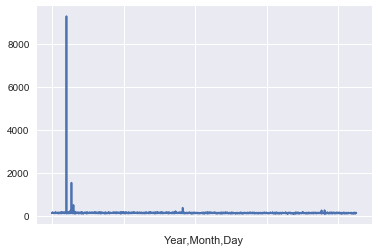

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df1.loc[(2007, 1, slice(20, 22)), 'ch_1'].plot()

plt.show()

In [21]:
df1.loc[(2018, 10, 4), 'ch_1'].min()

180

In [12]:
start = time.time()


df1['datetime'] = df1.apply(lambda r : pd.datetime.combine(r['datep'], r['timeut']), axis=1) # 2min 4s per loop
df1.head()

end = time.time()
print(end-start)

405.43027806282043


In [20]:
df1.head()

datep    timeut  ch_1  ch_2  ch_3  ch_4  ch_5  ch_6  \
Year Month Day                                                             
2006 10    20   2006-10-20  00:00:00   143   147   149   111   139   139   
           20   2006-10-20  00:01:00   127   144   141   108   127   127   
           20   2006-10-20  00:02:00   113   134   168   130   135   137   
           20   2006-10-20  00:03:00   137   160   135   139   121   159   
           20   2006-10-20  00:04:00   144   134   130   132   152   149   

                 ch_7   ch_8         ...          ch_10  ch_11  ch_12  ch_13  \
Year Month Day                       ...                                       
2006 10    20   203.0  172.0         ...          176.0  184.0  163.0    0.0   
           20   202.0  165.0         ...          181.0  182.0  175.0    0.0   
           20   194.0  168.0         ...          156.0  192.0  168.0    0.0   
           20   203.0  166.0         ...          185.0  187.0  168.0    0.0   
           20   175.0  160.0         ...          162.0  198.0  180.0    0.0   

                ch_14  ch_15  ch_16  ch_17  ch_18            datetime  
Year Month Day                                                         
2006 10    20     0.0    0.0    0.0    0.0    0.0 2006-10-20 00:00:00  
           20     0.0    0.0    0.0    0.0    0.0 2006-10-20 00:01:00  
           20     0.0    0.0    0.0    0.0    0.0 2006-10-20 00:02:00  
           20     0.0    0.0    0.0    0.0    0.0 2006-10-20 00:03:00  
           20     0.0    0.0    0.0    0.0    0.0 2006-10-20 00:04:00  

[5 rows x 21 columns]

In [18]:
channelValues = df1.loc[(2007, 2, 20), 'ch_1'].tolist()
datetimeValues = df1.loc[(2007, 2, 20), 'datetime'].tolist()

In [15]:
import matplotlib.dates as mdates

def setMonthlyParameters():
    months = mdates.MonthLocator()  # every month
    days = mdates.DayLocator()
    tickFmt = mdates.DateFormatter('%Y-%m-%d')
    
    datemin = np.datetime64(datetimeValues[0], 'D')
    datemax = np.datetime64(datetimeValues[-1], 'D') + np.timedelta64(1, 'D')
    
    return months, days, tickFmt, datemin, datemax
    

In [16]:
def setDailyParameters():
    days = mdates.DayLocator()
    hours = mdates.HourLocator()
    tickFmt = mdates.DateFormatter('%d/%h:%m:%s')
    
    datemin = np.datetime64(datetimeValues[0], 'h')
    datemax = np.datetime64(datetimeValues[-1], 'h') + np.timedelta64(1, 'h')
    
    return days, hours, tickFmt, datemin, datemax

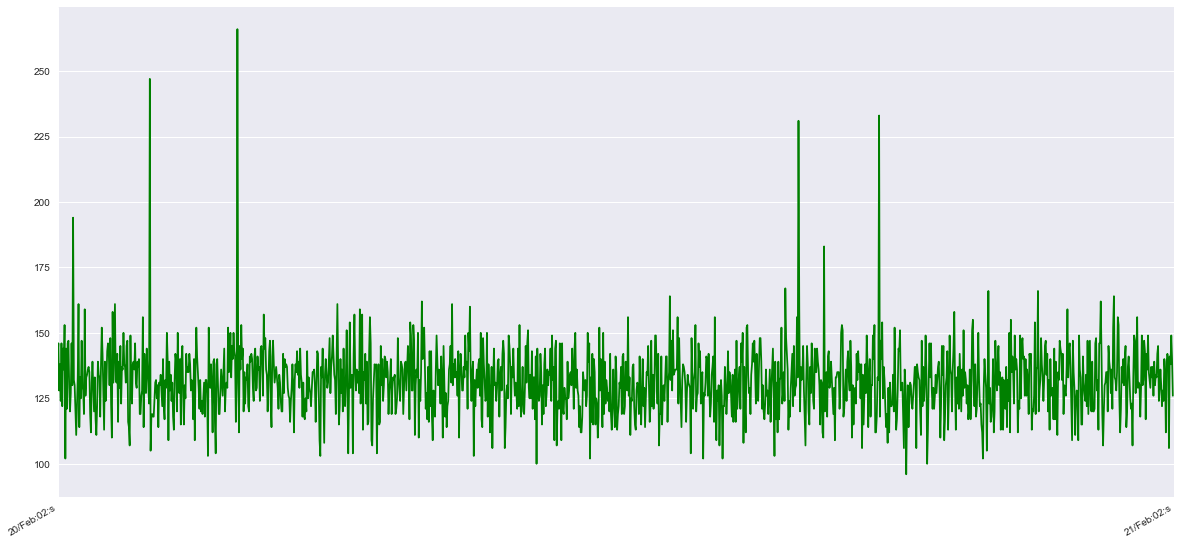

In [19]:
#import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#dates = md.date2num(X)
#plt.plot(X, Y)

#plt.plot_date(X, Y)
# beautify the x-labels
# '%Y/%MM/%D/%H:%M:%S'
#myFmt = md.DateFormatter('%H:%M:%S')
#plt.gca().xaxis.set_major_formatter(myFmt)

#years = mdates.YearLocator()   # every year
#months = mdates.MonthLocator()  # every month
#days = mdates.DayLocator()
#hours = mdates.HourLocator() #byhour = (0, 24, 1)
#hoursFmt = mdates.DateFormatter('%D/%H:%M:%S')
#hoursFmt = mdates.DateFormatter('%Y/%m/%d')

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(datetimeValues, channelValues, color='green')

months, days, tickFmt, datemin, datemax = setDailyParameters()

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(tickFmt)
ax.xaxis.set_minor_locator(days)

# round to nearest hours...
# Y, M, W, D, h, m, s
#datemin = np.datetime64(datetimeValues[0], 'D')
#datemax = np.datetime64(datetimeValues[-1], 'D') + np.timedelta64(1, 'D')
ax.set_xlim(datemin, datemax)


#ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
#ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

In [8]:


ch_1 = np.zeros(shape=(3,18))

In [11]:
ch_1[1] = np.arange(1,19)

In [12]:
print(ch_1)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]
 [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
   15.  16.  17.  18.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.]]


In [13]:
from collections import deque

In [17]:
import datetime

In [22]:
X_buffer = deque(maxlen=5)
#Y_buffer = np.zeros(10)
datet = np.zeros(2, dtype=datetime.datetime)

In [23]:
datet[0] = datetime.datetime.now()
datet[1] = datetime.datetime(2019, 3, 25, 11, 22, 23, 91664)

In [81]:
#X_buffer.append(datet)
vec = np.array([32, 46, 56, 7, 1, 90, 65, 2, 2, 66])
Y_buffer = np.arange(20)
print(Y_buffer)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [84]:
Y_buffer[:-2] = Y_buffer[2:]
Y_buffer[-2:] = vec[:2]
print(Y_buffer)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 32 46]


In [80]:
Y_buffer[-2*3]

1